<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CO2-from-0.1-to-0.5,-CH4-from-1E-4-to-0.2;-Archean+haze-template" data-toc-modified-id="CO2-from-0.1-to-0.5,-CH4-from-1E-4-to-0.2;-Archean+haze-template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CO2 from 0.1 to 0.5, CH4 from 1E-4 to 0.2; Archean+haze template</a></span></li></ul></div>

In [12]:
import AtmosSweeper
import numpy as np
import pandas as pd 


%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=12)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 12}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

In [2]:
files = ['../../input/templates/Archean+haze/species.dat', \
         '../../input/templates/Archean+haze/reactions.rx', \
         '../../input/templates/Archean+haze/planet.dat', \
         '../../input/templates/Archean+haze/input_photchem.dat', \
         '../../input/templates/Archean+haze/atmosphere.txt', \
         '../../input/templates/Archean+haze/Sun_2.7Ga.txt']

In [12]:
files3 = ['../../input/templates/ModernEarth/species.dat', \
         '../../input/templates/ModernEarth/reactions.rx', \
         '../../input/templates/ModernEarth/planet.dat', \
         '../../input/templates/ModernEarth/input_photchem.dat', \
         '../../input/templates/ModernEarth/atmosphere.txt', \
         '../../input/templates/ModernEarth/Sun_now.txt']

## CO2 from 0.1 to 0.5, CH4 from 1E-4 to 0.2; Archean+haze template 

In [3]:
# Methane
low_meth6 = -5
high_meth6 = -0.7
step_meth6 = .1
fCH4_6 = np.arange(low_meth6,high_meth6+1e-10,step_meth6) # LOG 10 space!!!!

# CO2
low_co26 = -1
high_co26 = -0.3
step_co26 = .1
fCO2_6 = np.arange(low_co26,high_co26+1e-10,step_co26) # LOG 10 space!!!!

# make a dictionary of the parameters
params_m6 = {'CH4':fCH4_6,
          'CO2':fCO2_6}

Number of points in grid = 352


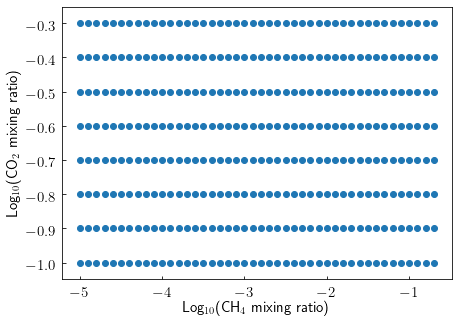

In [4]:
param_space6 = np.meshgrid(*(v for _, v in params_m6.items()),indexing='ij')

print('Number of points in grid =',len(param_space6[0].flatten()))

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
ax.scatter(param_space6[0].flatten(),param_space6[1].flatten())
ax.set_xlabel('Log$_{10}$(CH$_4$ mixing ratio)')
ax.set_ylabel('Log$_{10}$(CO$_2$ mixing ratio)')

plt.show()

In [5]:
out6 = AtmosSweeper.sweep(files, \
                         params_m6, \
                         max_processes = 6, \
                         verbose=True, \
                         nsteps_list=[5000], \
                         nsteps_init = 5000, \
                         random_seed=True, \
                         seeds=6) 

Trying to move to closest point on the grid...
Successful.
Randomly seeding space with 6 seeds
Done seeding.

Solving for grid with nsteps = 5000
| ITERATION 0                          |
| Converged =              5           |
| Failed to Converged =    0           |
| Unattempted =            347         |
| Possible Moves =         18          |
| Time to try all moves =  205 s       |
|                                      |
| ITERATION 1                          |
| Converged =              23          |
| Failed to Converged =    0           |
| Unattempted =            329         |
| Possible Moves =         33          |
| Time to try all moves =  396 s       |
|                                      |
| ITERATION 2                          |
| Converged =              56          |
| Failed to Converged =    0           |
| Unattempted =            296         |
| Possible Moves =         38          |
| Time to try all moves =  1262 s      |
|                                 

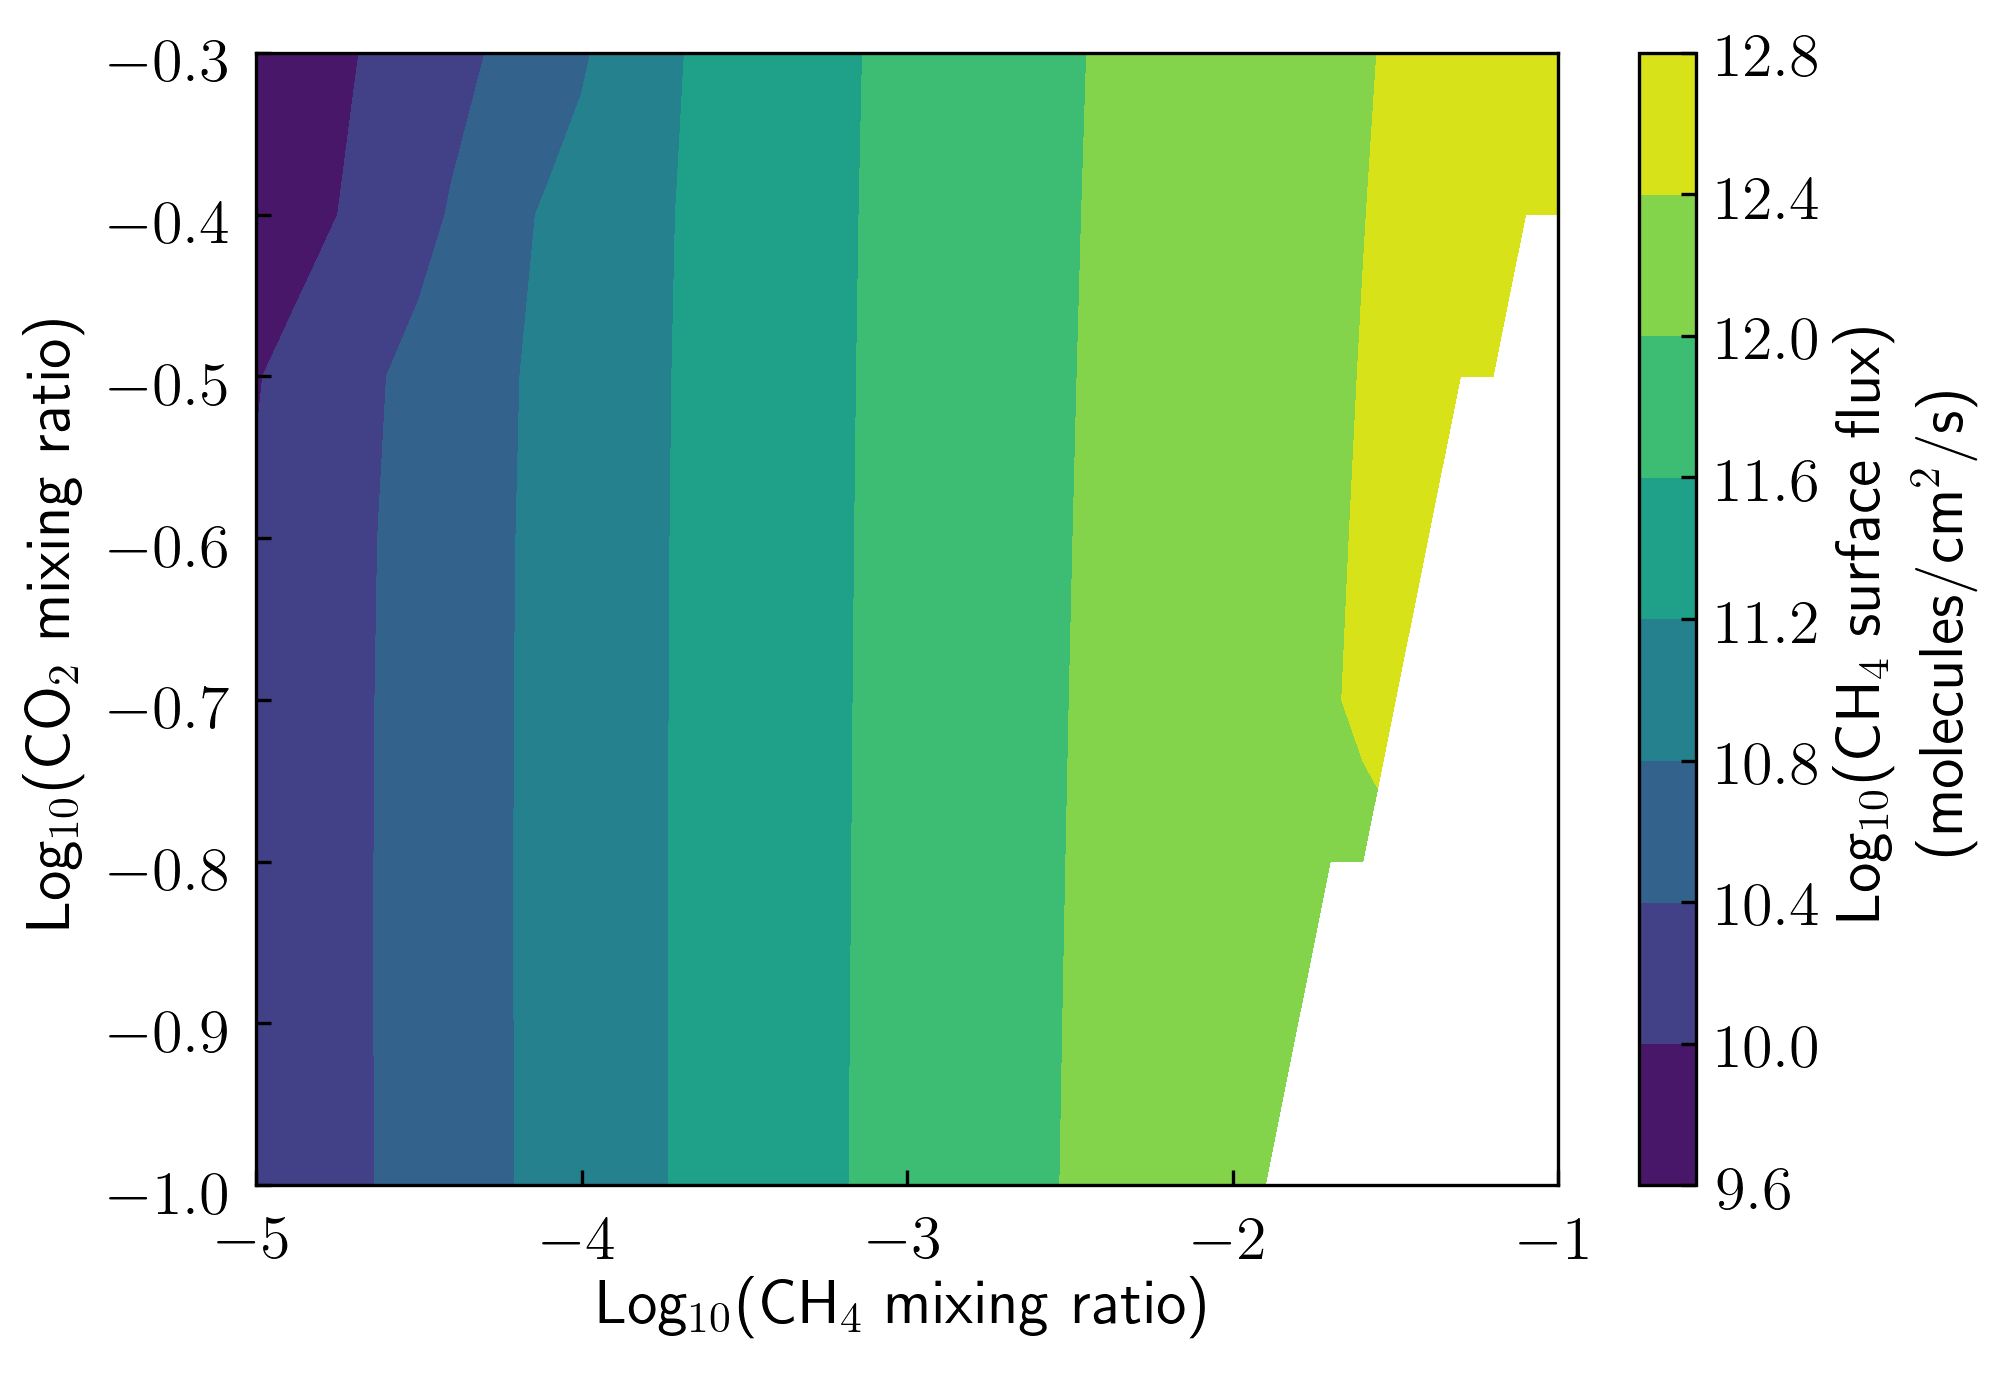

In [226]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

fluxes6 = out6[1] # fluxes
PhiCH4_6 = np.zeros(fluxes6.shape)*np.nan
for i in range(fluxes6.shape[0]):
    for j in range(fluxes6.shape[1]):
        try:
            PhiCH4_6[i,j] = fluxes6[i,j]['CH4']
        except:
            pass
#print(PhiCH4_6)
cs = ax.contourf(param_space6[0],param_space6[1],np.log10(PhiCH4_6),hatches=[None])
cbar = fig.colorbar(cs)
ax.set_xlabel('Log$_{10}$(CH$_4$ mixing ratio)')
ax.set_ylabel('Log$_{10}$(CO$_2$ mixing ratio)')
plt.xlim(-5,-1)
cbar.set_label("Log$_{10}$(CH$_4$ surface flux)\n(molecules/cm$^2$/s)")
#plt.savefig('Archeanhaze_052521_CH41E-52E-1_CO21E-15E-1.jpg', dpi=1000)
plt.show()

In [26]:

#print(param_space6[0])
param_space_rearr0 = param_space6[0].reshape(param_space6[0].shape[0], -1)
param_space_rearr1 = param_space6[1].reshape(param_space6[1].shape[0], -1)
PhiCH4_rearr = PhiCH4_6.reshape(PhiCH4_6.shape[0], -1)


np.savetxt('OutputData_ArcheanHazePlot_ParamSpace0.txt', param_space6[0])
np.savetxt('OutputData_ArcheanHazePlot_ParamSpace1.txt', param_space6[1])
np.savetxt('OutputData_ArcheanHazePlot_PhiCH4.txt', PhiCH4_6)


In [200]:
import os
import glob 

path_AnoHaze = '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/*.txt'
files_AnoHaze = sorted(glob.glob(path_AnoHaze))

print(files_AnoHaze)
#Archean_NoHaze_Test = np.loadtxt('~/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp9.txt')
def read_files(file, val):
    data_load = np.loadtxt(file, unpack=True)
    final_df = pd.DataFrame(data_load, columns=['MR', 'Flux'])
    final_df['CO2'] = [val]*20
    return final_df

Archean_NoHaze_CO2minus1 = read_files(files_AnoHaze[0], 0.10)
Archean_NoHaze_CO2minusp4 = read_files(files_AnoHaze[1], 0.398)
Archean_NoHaze_CO2minusp5 = read_files(files_AnoHaze[2], 0.316)
Archean_NoHaze_CO2minusp6 = read_files(files_AnoHaze[3], 0.251)
Archean_NoHaze_CO2minusp7 = read_files(files_AnoHaze[4], 0.20)
Archean_NoHaze_CO2minusp8 = read_files(files_AnoHaze[5], 0.158)
Archean_NoHaze_CO2minusp9 = read_files(files_AnoHaze[6], 0.126)



print((Archean_NoHaze_CO2minusp4))
print((Archean_NoHaze_CO2minusp9))

frames = [Archean_NoHaze_CO2minus1, Archean_NoHaze_CO2minusp4, Archean_NoHaze_CO2minusp5, Archean_NoHaze_CO2minusp6, Archean_NoHaze_CO2minusp7, Archean_NoHaze_CO2minusp8, Archean_NoHaze_CO2minusp9]
Archean_NoHaze = pd.concat(frames)



['/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minus1.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp4.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp5.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp6.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp7.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp8.txt', '/Users/maggiethompson/Desktop/UCSantaCruz/PhotochemPy/examples/Parallel_parameter_sweep/ArcheanNoHaze_CO2minusp9.txt']
          MR          Flux    CO2
0   0.003467  1.006643e+12  0.398
1   0.004189  1.114891e+12  0.398
2   0.005061  1.230688e+12  0.398
3   0.006114  1.353792e+

In [201]:
CO2_Arr = np.array([np.array(Archean_NoHaze_CO2minusp4['CO2'].values), np.array(Archean_NoHaze_CO2minusp5['CO2'].values), np.array(Archean_NoHaze_CO2minusp6['CO2'].values), np.array(Archean_NoHaze_CO2minusp7['CO2'].values), np.array(Archean_NoHaze_CO2minusp8['CO2'].values), np.array(Archean_NoHaze_CO2minusp9['CO2'].values), np.array(Archean_NoHaze_CO2minus1['CO2'].values)])
MR_Arr = np.array([np.array(Archean_NoHaze_CO2minusp4['MR'].values), np.array(Archean_NoHaze_CO2minusp5['MR'].values), np.array(Archean_NoHaze_CO2minusp6['MR'].values), np.array(Archean_NoHaze_CO2minusp7['MR'].values), np.array(Archean_NoHaze_CO2minusp8['MR'].values), np.array(Archean_NoHaze_CO2minusp9['MR'].values), np.array(Archean_NoHaze_CO2minus1['MR'].values)])
Flux_Arr = np.array([np.array(Archean_NoHaze_CO2minusp4['Flux'].values), np.array(Archean_NoHaze_CO2minusp5['Flux'].values), np.array(Archean_NoHaze_CO2minusp6['Flux'].values), np.array(Archean_NoHaze_CO2minusp7['Flux'].values), np.array(Archean_NoHaze_CO2minusp8['Flux'].values), np.array(Archean_NoHaze_CO2minusp9['Flux'].values), np.array(Archean_NoHaze_CO2minus1['Flux'].values)])

#print(np.log10(MR_Arr))
print(CO2_Arr.shape)

(7, 20)


In [242]:
colorbar = np.linspace(9.6,12.8,9)
print(colorbar)

for i,j in zip(param_space6[0], PhiCH4_6):
    #print(i)
    for x in j:
        if 1.1e11 < x < 1.2e11:
            print(x, i)

[ 9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8]
115876197465.11554 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]
116200520635.5165 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]
116309474399.19318 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]
116092234493.42688 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]
115378922890.0701 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]
113795593922.87077 [-3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9 -3.9]


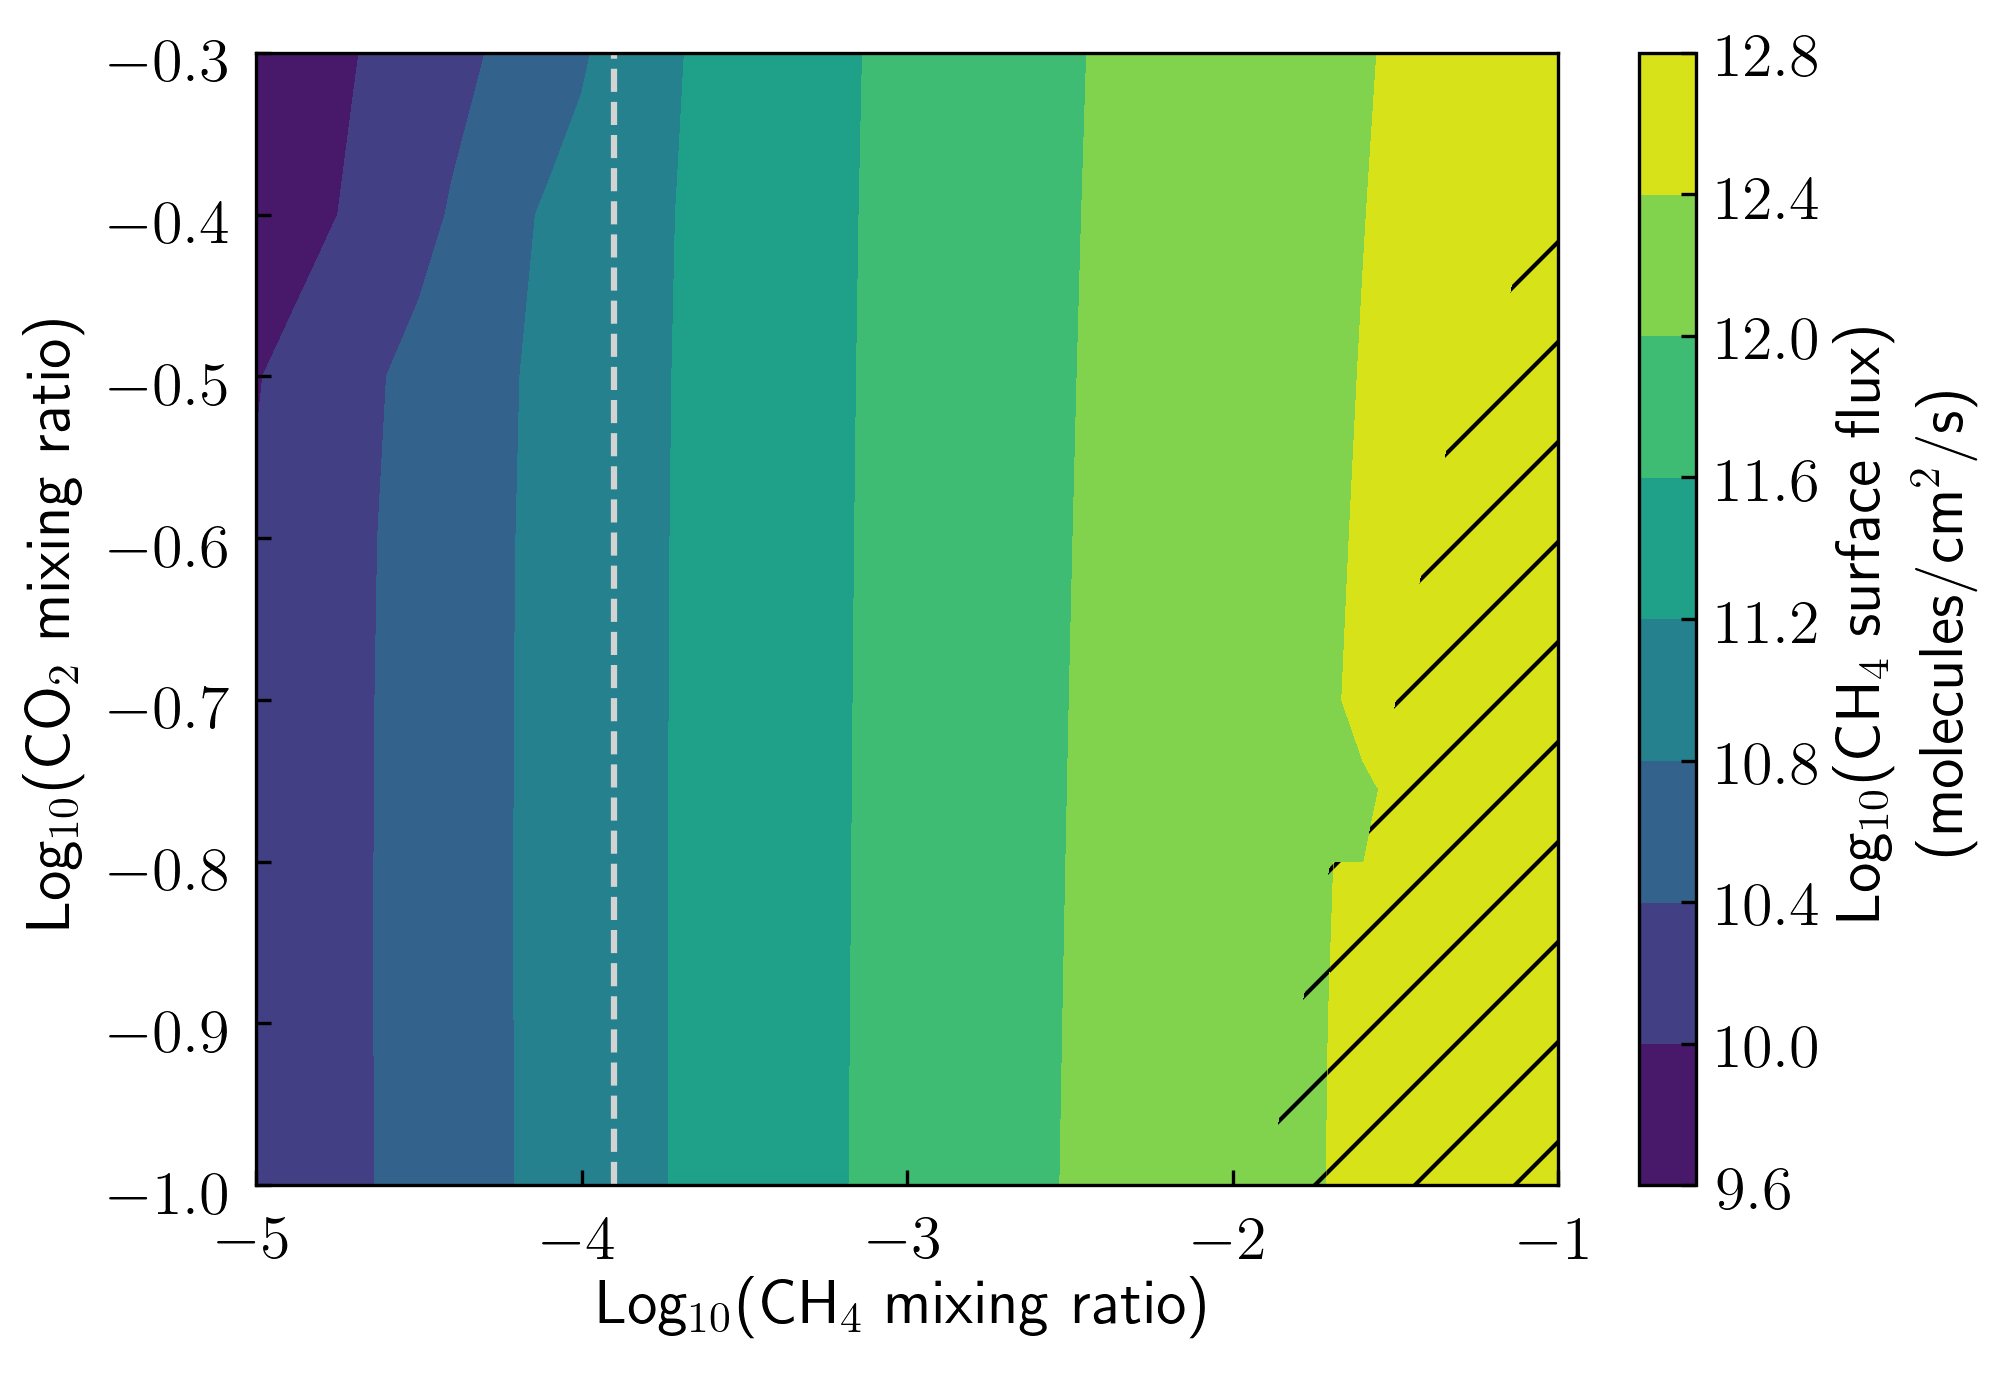

In [244]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
#norm = matplotlib.colors.Normalize(vmin=9.6,vmax=12.8)
cs=ax.contourf(np.log10(MR_Arr), np.log10(CO2_Arr),np.log10(Flux_Arr), colorbar, hatches=['/'])
cs2 =ax.contourf(param_space6[0],param_space6[1],np.log10(PhiCH4_6), colorbar, hatches=[None])
plt.axvline(x=-3.9, linestyle='--', color='lightgray')
cbar = plt.colorbar(cs2, ticks=colorbar)
ax.set_xlabel('Log$_{10}$(CH$_4$ mixing ratio)')
ax.set_ylabel('Log$_{10}$(CO$_2$ mixing ratio)')
plt.xlim(-5,-1)
cbar.set_label("Log$_{10}$(CH$_4$ surface flux)\n(molecules/cm$^2$/s)")
#plt.savefig('ArcheanAll_052521_CH41E-52E-1_CO21E-15E-1.jpg', dpi=1000)
plt.show()

In [204]:
mix6 = out6[0] # atmosheres
H2O_6 = np.zeros(mix6.shape)*np.nan
for i in range(mix6.shape[0]):
    for j in range(mix6.shape[1]):
        try:
            H2O_6[i,j] = mix6[i,j]['H2O'][0] # ground level H2
        except:
            pass
print(H2O_6)

[[0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  0.00875177 0.00875177]
 [0.00875177 0.00875177 0.00875177 0.00875177 0.00875177 0.00875177
  

In [206]:

H2_6 = np.zeros(mix6.shape)*np.nan
for i in range(mix6.shape[0]):
    for j in range(mix6.shape[1]):
        try:
            H2_6[i,j] = mix6[i,j]['H2'][0] # ground level H2
        except:
            pass
print(H2_6)

[[6.67102981e-05 2.82020432e-04 5.92327254e-05 5.54870608e-05
  5.16780544e-05 2.41073125e-04 3.89985273e-05 8.08245044e-05]
 [6.74566617e-05 6.37110967e-05 5.99825808e-05 5.62314392e-05
  9.10771716e-05 2.49344244e-04 4.28272527e-05 3.89985273e-05]
 [6.83842140e-05 6.46436665e-05 6.09157504e-05 5.71590373e-05
  5.33188407e-05 4.91159701e-05 1.18532802e-04 3.93095344e-05]
 [1.41234591e-04 2.88877305e-04 6.20734006e-05 5.83114078e-05
  5.44547760e-05 5.02323467e-05 4.37882202e-05 5.54870608e-05]
 [7.09512143e-05 5.97438353e-05 2.53631596e-04 5.44547760e-05
  5.58647804e-05 5.16295724e-05 4.45523588e-05 5.62314392e-05]
 [1.77918784e-04 3.33054662e-04 6.52624264e-05 6.14932922e-05
  1.45261798e-04 5.33639810e-05 4.56886211e-05 2.37962409e-04]
 [1.62099096e-04 7.11211364e-05 4.28272527e-05 1.37141817e-04
  5.97438353e-05 5.54994030e-05 4.75760053e-05 9.56789181e-05]
 [7.73998571e-05 6.83378961e-05 7.00222068e-05 3.39066589e-04
  6.23483689e-05 5.81062706e-05 1.22428480e-04 4.28041859e-05]


1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
22 0
22 1
22 2
22 3
22 4
22 5
22 6
22 7
23 0
23 1
23 2
23 3
23 4
23 5
23 6
23 7
24 0
24 1
24 2
24 3
24 4
24 5
24 6
24 7
25 0
25 1
25 2
25 3
25 4
25 5
25 6
25 7
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
27 0
27 1
27 2
27 3
27 4
27 5
27

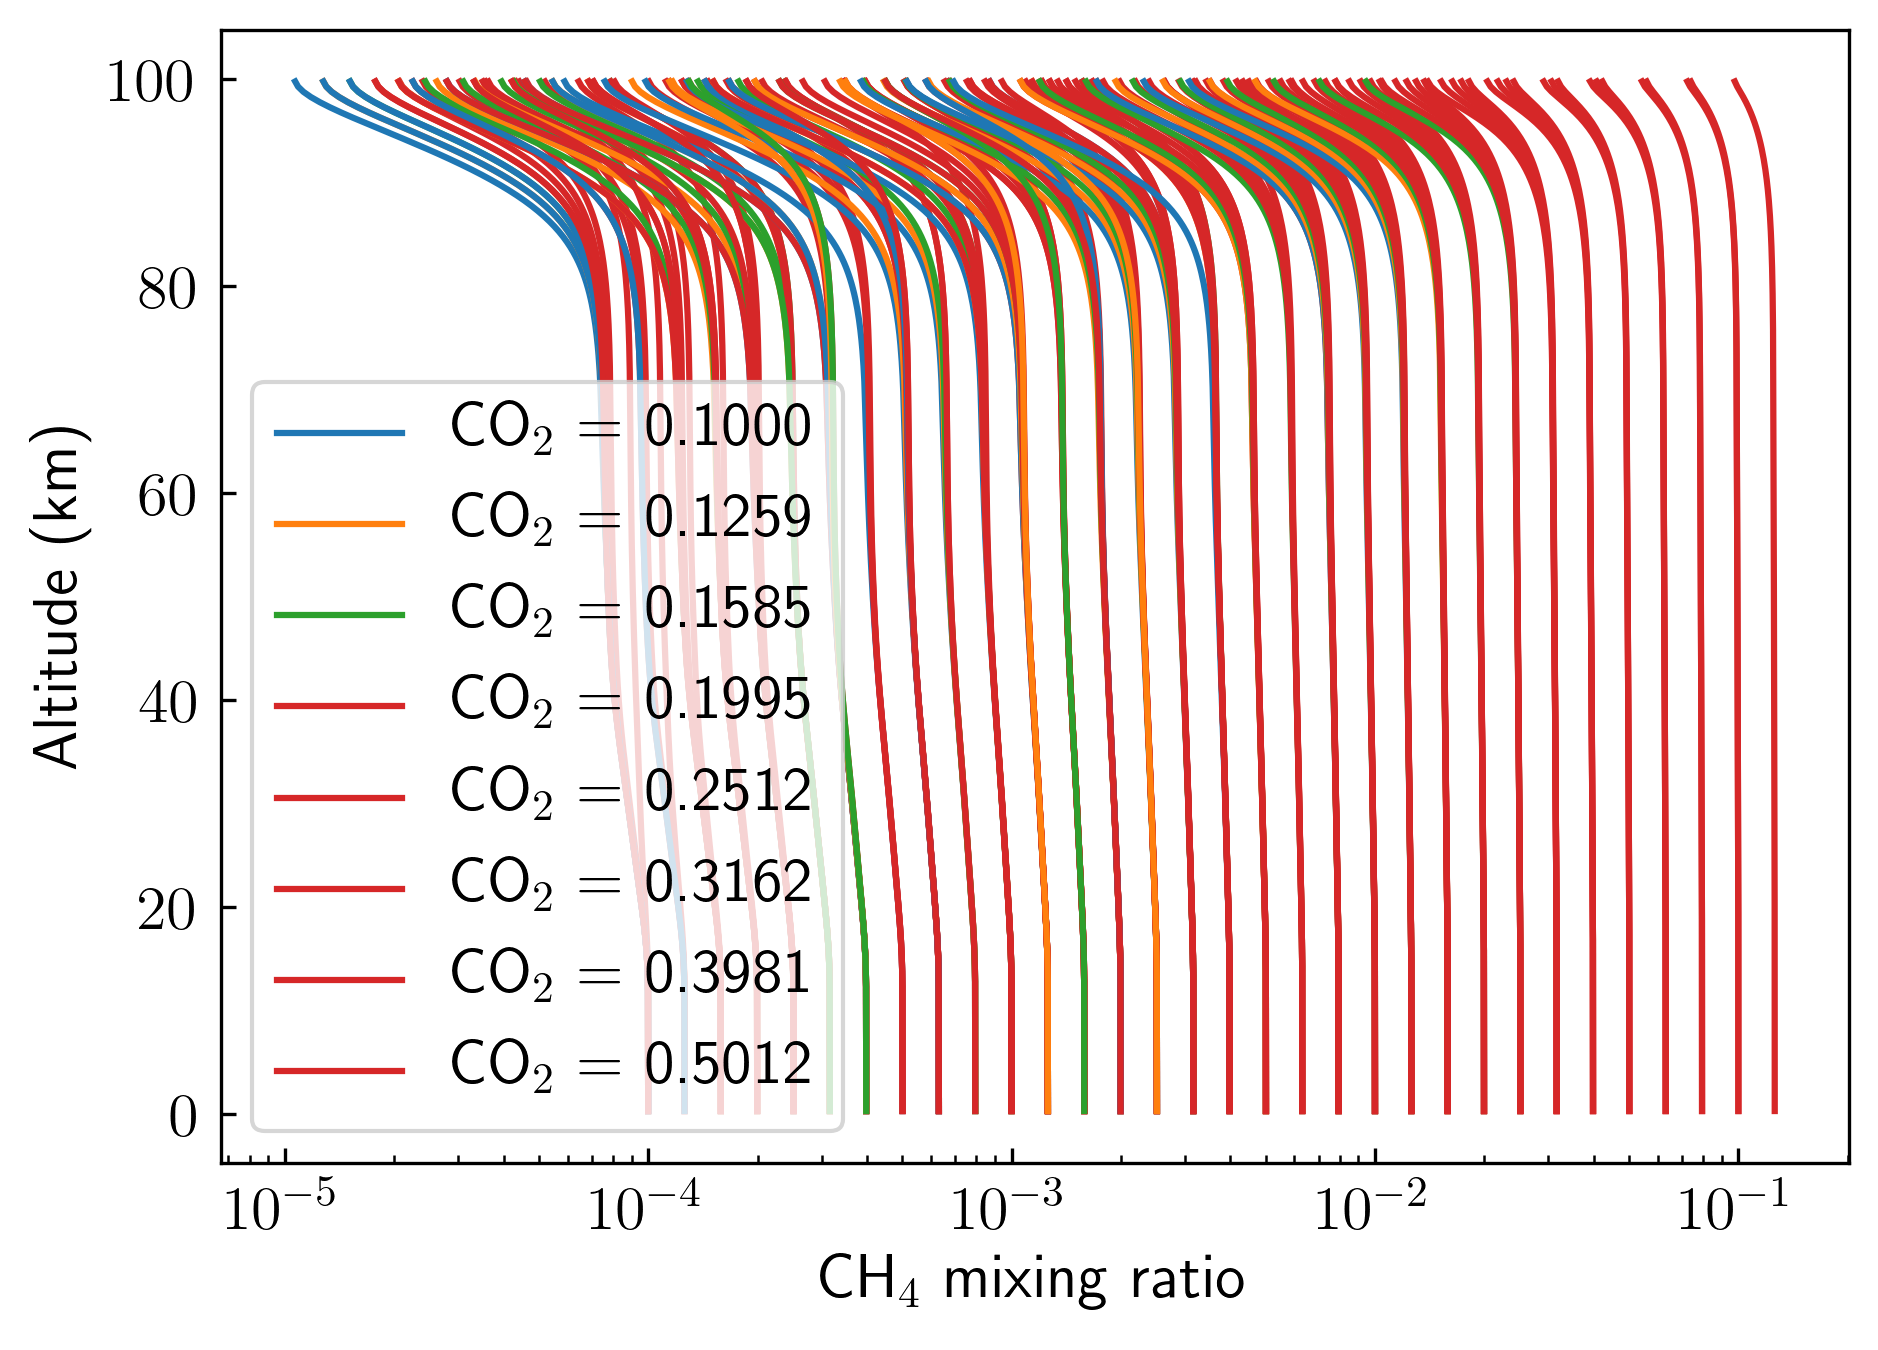

In [121]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

def pltcolor(l):
    if l==0:
        cols = 'C0'
    elif l==1:
        cols = 'C1'
    elif l==2:
        cols = 'C2'
    else:
        cols = 'C3'
    return cols

temp = 0
for i in range(mix6.shape[0]):
    for j in range(mix6.shape[1]):
        try:
            if i == 0:
                ax.plot(mix6[i,j]['CH4'],mix6[i,j]['alt'],pltcolor(j),label='CO$_2$ = '+'%.4f'%(10**params_m6['CO2'][j])) 
            else:
                print(i,j)
                ax.plot(mix6[i,j]['CH4'],mix6[i,j]['alt'],pltcolor(j)) 
        except:
            pass

ax.set_xscale('log')
ax.set_xlabel('CH$_4$ mixing ratio')
ax.set_ylabel('Altitude (km)')
ax.legend()

plt.show()

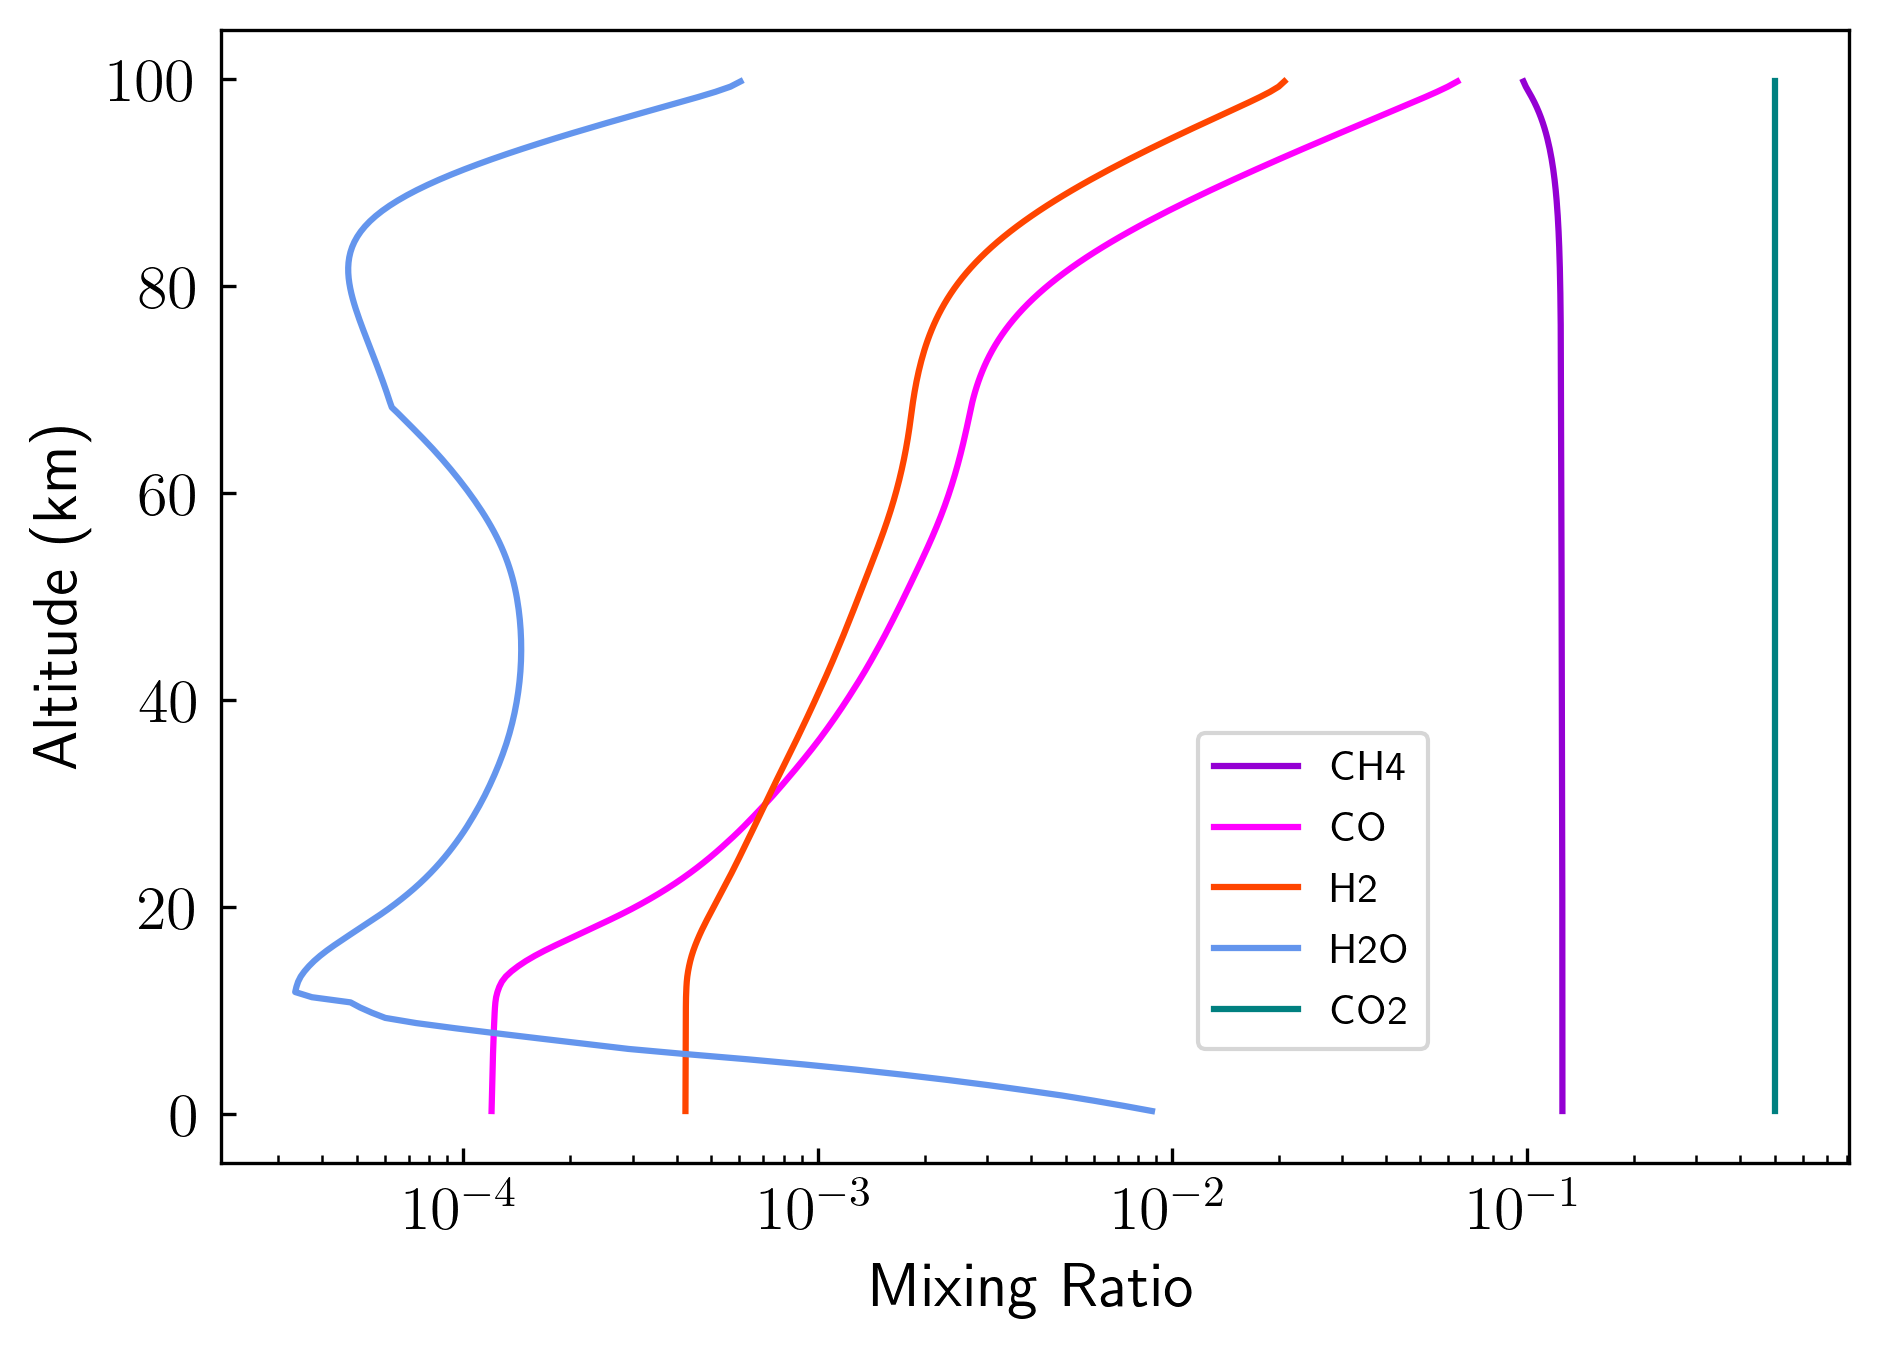

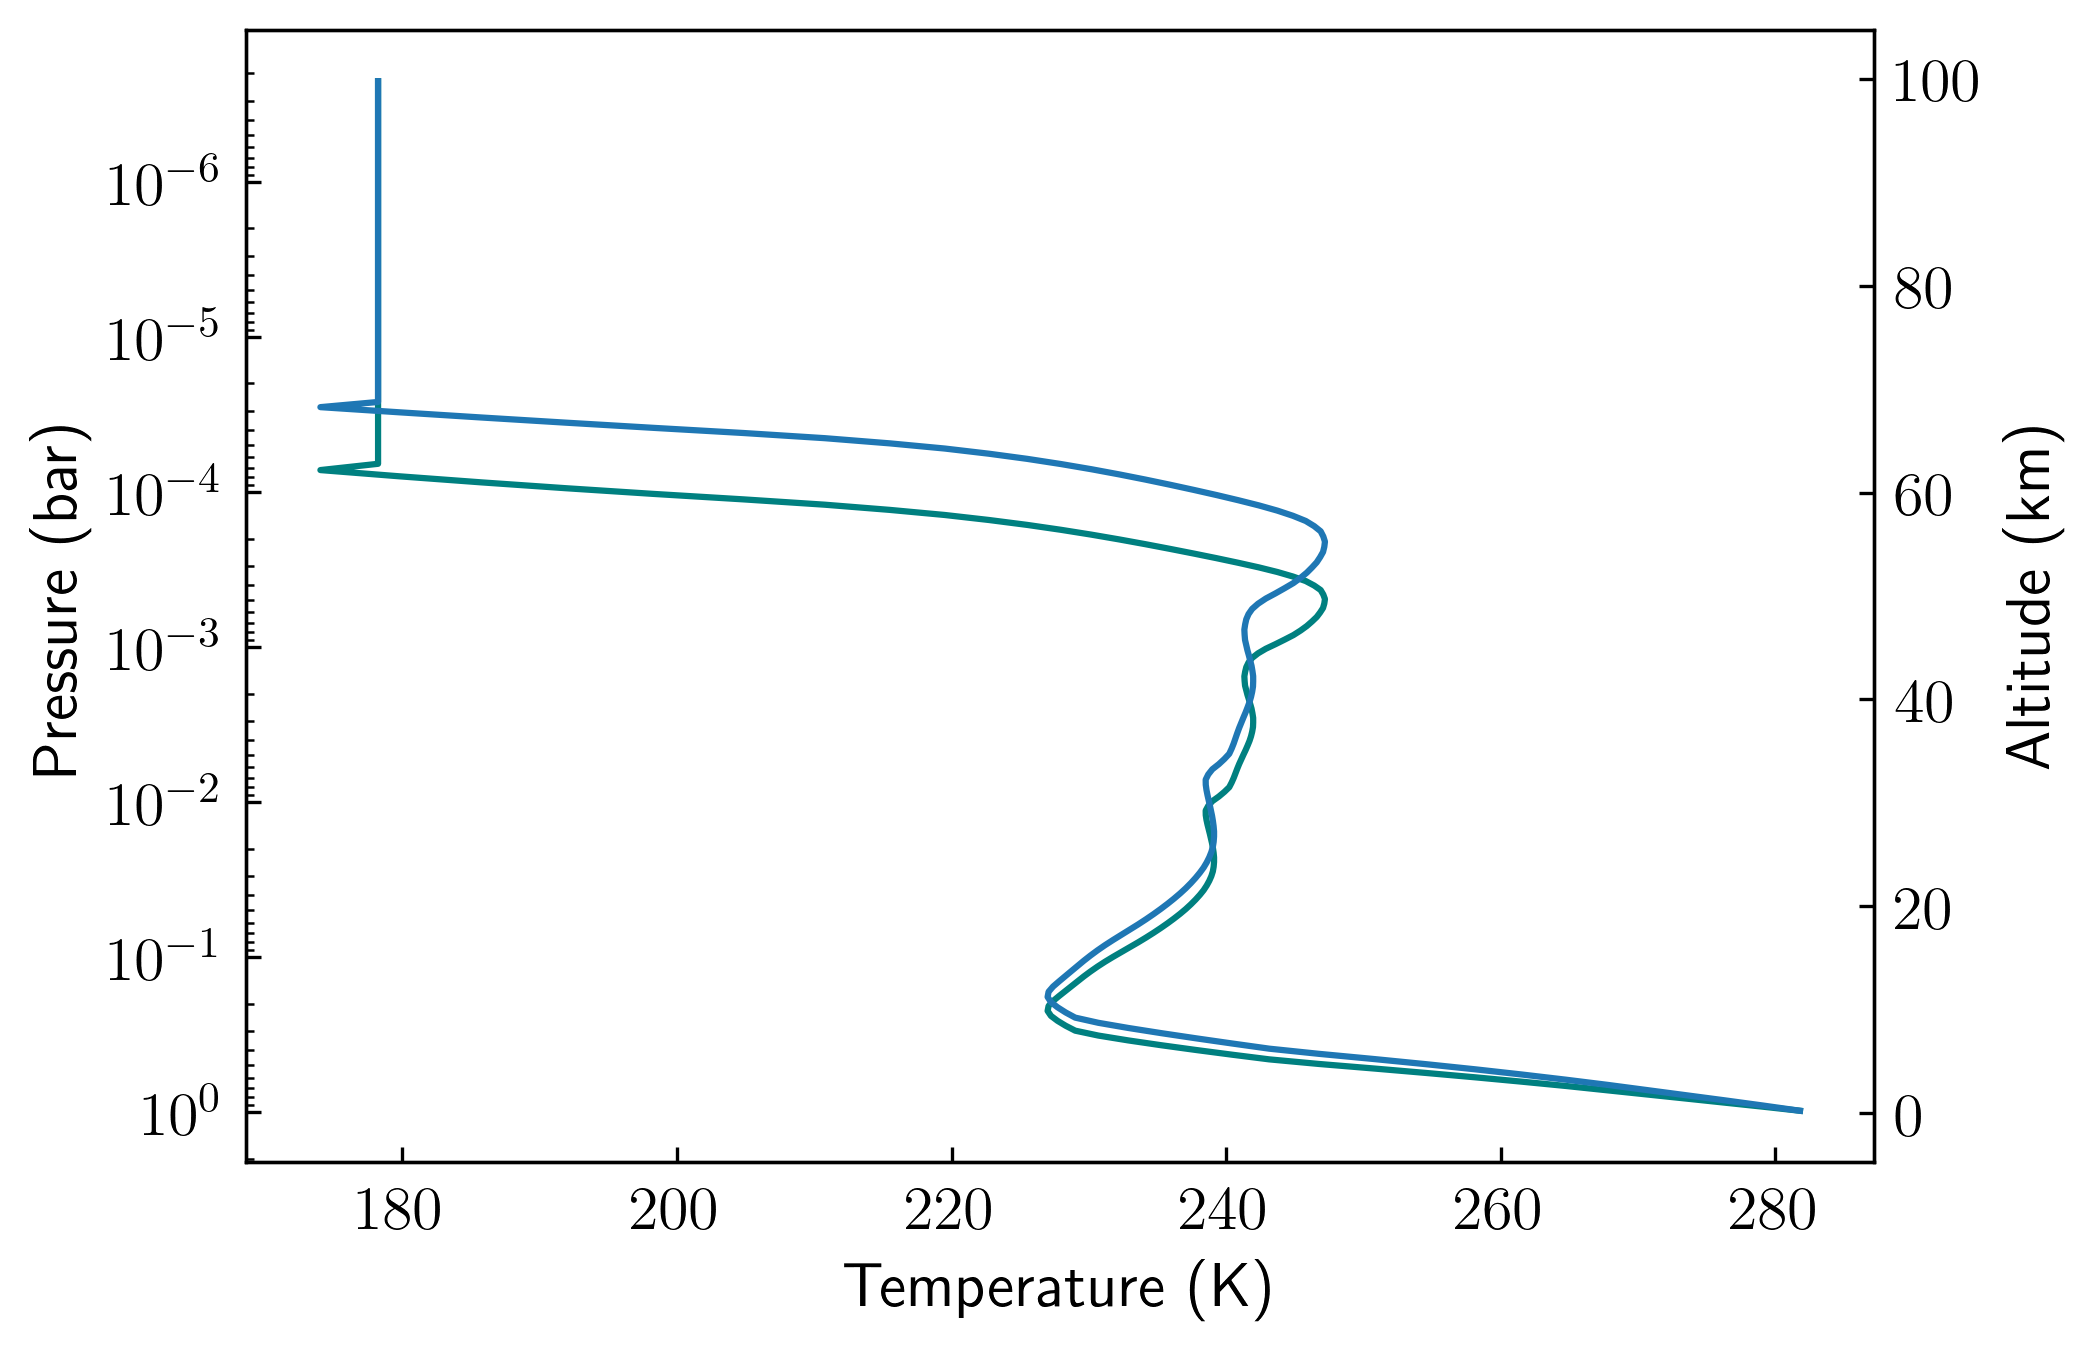

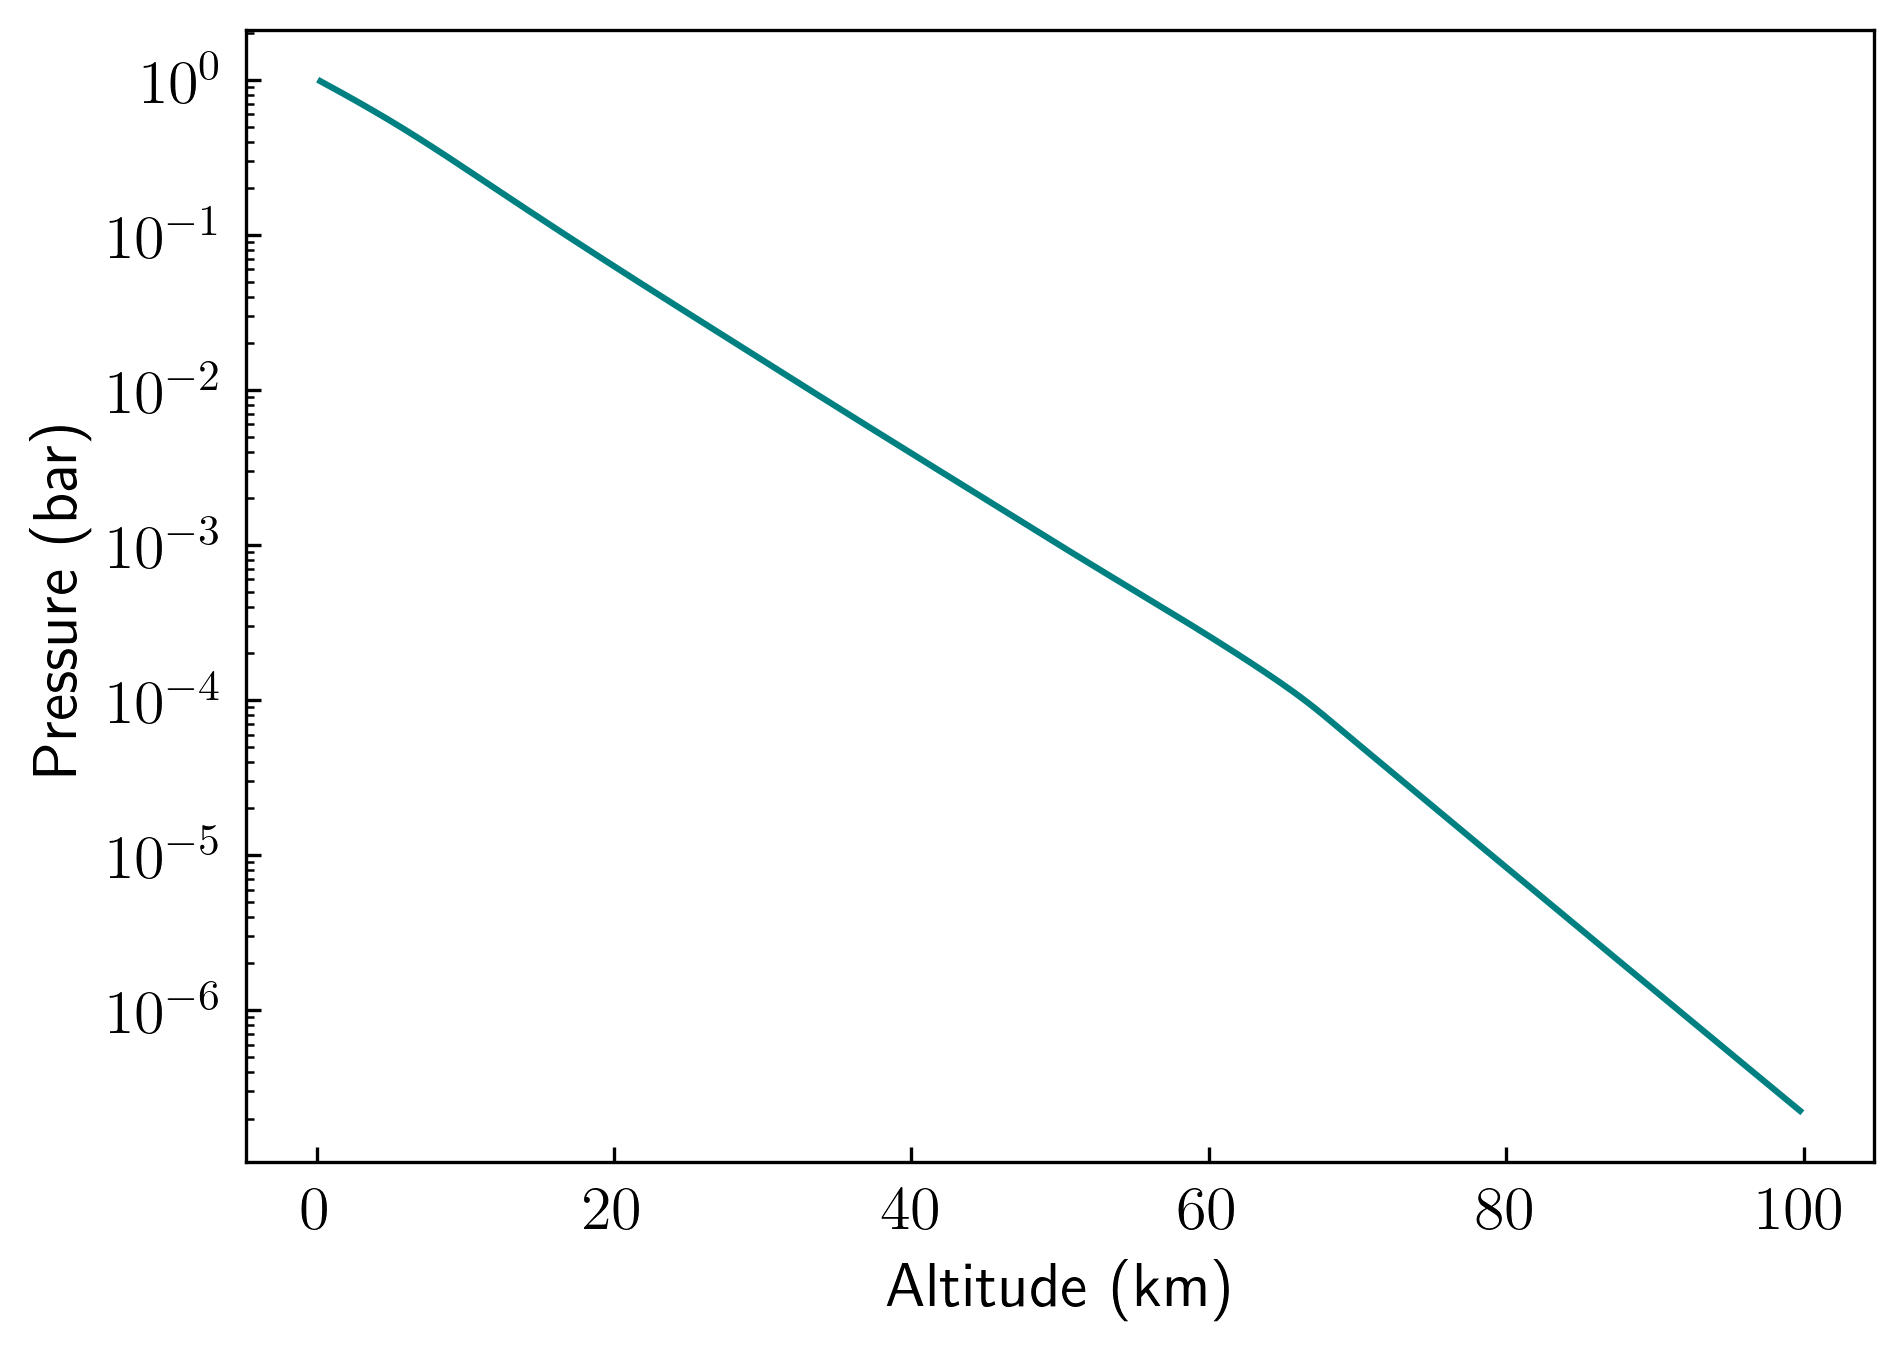

In [149]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
ax.plot(mix6[31,7]['CH4'],mix6[31,7]['alt'], label='CH4', color='darkviolet') 
ax.plot(mix6[31,7]['CO'],mix6[31,7]['alt'], label='CO', color='fuchsia') 
#ax.plot(mix6[0,0]['CO2'],mix6[0,0]['alt'],label='CO2') 
ax.plot(mix6[31,7]['H2'],mix6[31,7]['alt'], label='H2', color='orangered') 
ax.plot(mix6[31,7]['H2O'],mix6[31,7]['alt'], label='H2O', color='cornflowerblue') 
ax.plot(np.full(shape=200,fill_value=0.50), mix6[31,7]['alt'], label='CO2', color='teal')
ax.set_xscale('log')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')
ax.legend(loc=(0.6,0.1), prop={'size': 10})
plt.savefig('MixingRatios_Altitude.jpg', dpi=1000)
plt.show()

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
ax.plot(mix6[31,7]['T'],mix6[31,7]['press'], color='teal') 
ax.set_yscale('log')
plt.gca().invert_yaxis()
ax2 = ax.twinx()
ax2.plot(mix6[31,7]['T'], mix6[31,7]['alt'])
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax2.set_ylabel('Altitude (km)')
#ax.legend(loc=(0.7,0.1), prop={'size': 10})
plt.show()

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
ax.plot(mix6[31,7]['alt'],mix6[31,7]['press'], color='teal') 
ax.set_yscale('log')
ax.set_xlabel('Altitude (km)')
ax.set_ylabel('Pressure (bar)')

#ax.legend(loc=(0.7,0.1), prop={'size': 10})
plt.show()